# Prosper Loan Data Exploration
## by Adeyemi Inioluwa

## Introduction
This document explores a dataset containing a peer to peer loan information consisting of approximately 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# overview of data shape 
df.shape

(113937, 81)

In [4]:
# overview of data composition and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
#view the first five rows
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# Brief summary statistics
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# checking the columns
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

#### Subsetting the Dataframe

> For the purpose of this analysis, I am going to select coumns that we will need for exploration

In [8]:
df_loan = df[['ListingNumber', 'ListingCreationDate', 
       'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']]

#### Assessing the Dataframe

In [9]:
# view the first five rows
df_loan.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,...,Self-employed,2.0,True,0.17,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,A,7.0,2,CO,...,Employed,44.0,False,0.18,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,...,Not available,NaN,False,0.06,Not displayed,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,A,9.0,16,GA,...,Employed,113.0,True,0.15,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,D,4.0,2,MN,...,Employed,44.0,True,0.26,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97


In [10]:
# Getting a concise summary
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanOr

In [11]:
# Check for missing values
df_loan.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
DebtToIncomeRatio             8554
IncomeRange                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
dtype: int64

In [12]:
# Check for duplicates
df_loan.duplicated().sum()

0

In [13]:
# Getting the count of unique values in ProsperRating (Alpha) column

df_loan['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [14]:
# Getting the count of unique values in ProsperScore column

df_loan['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [15]:
# Getting the count of unique values in ListingCategory (numeric) column

df_loan['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [16]:
# Getting the count of unique values in Occupation column

df_loan['Occupation'].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [17]:
# Getting the count of unique values in EmploymentStatus column

df_loan['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [18]:
# Getting the count of unique values in IsBorrowerHomeowner column

df_loan['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [19]:
# Getting the count of unique values in IncomeRange column

df_loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [20]:
# Getting the count of unique values in StatedMonthlyIncome column

df_loan['StatedMonthlyIncome'].value_counts().head(10)

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
5833.333333    2319
6250.000000    2276
2500.000000    2256
4583.333333    2211
6666.666667    2162
Name: StatedMonthlyIncome, dtype: int64

#### Observations

1. Missing values present in the following columns BorrowerAPR, ProsperRating (Alpha), ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, DebtToIncomeRatio
2. Convert ListingNumber to string data type, ListingCreationDate and LoanOriginationDate to date time
3. Convert ListingCategory (numeric) to Categorical datatype, LoanStatus from string to Categorial datatype, ProsperRating(Alpha) and ProsperScore from string to Categorical datatype, EmploymentStatus from string to Categorical and IncomeRange to Ordered Categorical datatype.
4. Convert IsBorrowerHomeowner from boolea to string and replacing True with 'home owner' and false with 'not home owner'

#### Cleaning the Dataframe


In [21]:
# filtering out the missing values in BorrowerAPR column

df_loan = df_loan[~df_loan.BorrowerAPR.isna()]

In [22]:
# filtering out the missing values in ProsperRating (Alpha)  column, this column is important for risk assessment of level of loans

df_loan = df_loan[~df_loan['ProsperRating (Alpha)'].isna()]

In [23]:
# filtering out the missing values in EmploymentStatusDuration column

df_loan = df_loan[~df_loan['EmploymentStatusDuration'].isna()]

In [24]:
# filtering out the missing values in EmploymentStatusDuration column

df_loan = df_loan[~df_loan['DebtToIncomeRatio'].isna()]

In [25]:
# Filling misssing values in the occupation column with none

df_loan = df_loan[~df_loan['Occupation'].isna()]

In [26]:
# Rounding of StatedMonthlyIncome to2 decimal places

df_loan['StatedMonthlyIncome'] = df_loan['StatedMonthlyIncome'].round(decimals = 0)

# test

df_loan['StatedMonthlyIncome'].value_counts().head(10)

4167.0    2401
5000.0    2266
3333.0    1890
5833.0    1816
5417.0    1750
6250.0    1642
4583.0    1604
6667.0    1601
3750.0    1588
8333.0    1201
Name: StatedMonthlyIncome, dtype: int64

In [27]:
# Checking for misssing values

df_loan.isnull().sum()

ListingNumber                0
ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
DebtToIncomeRatio            0
IncomeRange                  0
StatedMonthlyIncome          0
LoanOriginalAmount           0
LoanOriginationDate          0
LoanOriginationQuarter       0
MonthlyLoanPayment           0
dtype: int64

In [28]:
# Imort package to conver to Datetime

from datetime import datetime

In [29]:
# Converting the Datetime columns

df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])

df_loan['LoanOriginationDate'] = pd.to_datetime(df_loan['LoanOriginationDate'])

In [30]:
# Extarcting month, year and time from LoanOriginationDate

df_loan['LoanOriginationYear'] = df_loan['LoanOriginationDate'].dt.year

df_loan['LoanOriginationMonth'] = df_loan['LoanOriginationDate'].dt.month

df_loan['LoanOriginationTime'] = df_loan['LoanOriginationDate'].dt.time

In [31]:
# Drop LoanOriginationDate column
df_loan = df_loan.drop(['LoanOriginationDate'], axis = 1)

# test
df_loan.head(3)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,A,7.0,2,CO,...,False,0.18,"$50,000-74,999",6125.0,10000,Q1 2014,318.93,2014,3,00:00:00
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,A,9.0,16,GA,...,True,0.15,"$25,000-49,999",2875.0,10000,Q4 2012,321.45,2012,11,00:00:00
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,D,4.0,2,MN,...,True,0.26,"$100,000+",9583.0,15000,Q3 2013,563.97,2013,9,00:00:00


In [32]:
# Replace month number with month name
df_loan['LoanOriginationMonth'] = df_loan['LoanOriginationMonth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                                                       ['January', 'February', 'March', 'April', 'May', 
                                                                        'June', 'July', 'August', 'September', 'October',
                                                                       'November', 'December'])

# test
df_loan.head(3)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,A,7.0,2,CO,...,False,0.18,"$50,000-74,999",6125.0,10000,Q1 2014,318.93,2014,March,00:00:00
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,A,9.0,16,GA,...,True,0.15,"$25,000-49,999",2875.0,10000,Q4 2012,321.45,2012,November,00:00:00
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,D,4.0,2,MN,...,True,0.26,"$100,000+",9583.0,15000,Q3 2013,563.97,2013,September,00:00:00


In [33]:
# Combining 'Not displayed', 'Not employed', and '$0'  in one category

df_loan['IncomeRange'].replace(['Not displayed', 'Not employed'], '0$', inplace = True)

In [34]:

# Convert ProsperRating(Alpha), ProsperScore and IncomeRange, LoanOriginationMonth, and LoanOriginationYear  to ordinal categorial type

ordinal_var_dict = {'ProsperRating (Alpha)' : ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'ProsperScore' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'LoanOriginationMonth' : ['January', 'February', 'March', 'April', 'May','June',
                                              'July', 'August', 'September', 'October', 'November', 'December'],
                    'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
                                   '$1-24,999', '$0']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loan[var] = df_loan[var].astype(ordered_var)

In [35]:
# Convert ListingCategory (numeric), LoanStatus, EmploymentStatus to Categorical datatype

df_loan['ListingCategory (numeric)'] = df_loan['ListingCategory (numeric)'].astype('category')

df_loan['LoanStatus'] = df_loan['LoanStatus'].astype('category')

df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype('category')                                                                                  

In [36]:
# Convert ListingNumber and IsBorrowerHomeowner to string and replacing True with 'home owner' and false with 'not home owner'

df_loan['ListingNumber'] = df_loan['ListingNumber'].astype('str')

df_loan['IsBorrowerHomeowner'] = df_loan['IsBorrowerHomeowner'].map({True : 'True', False : 'False'})

# Replace True and False

df_loan['IsBorrowerHomeowner'].replace('True', 'home owner', inplace = True)

df_loan['IsBorrowerHomeowner'].replace('False', 'not home owner', inplace = True)

In [37]:
# Convert to categorical datatype

df_loan['IsBorrowerHomeowner'] = df_loan['IsBorrowerHomeowner'].astype('category')

#test

df_loan['IsBorrowerHomeowner'].value_counts()

home owner        41454
not home owner    34762
Name: IsBorrowerHomeowner, dtype: int64

In [38]:
# A concise summary

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
ListingNumber                76216 non-null object
ListingCreationDate          76216 non-null datetime64[ns]
Term                         76216 non-null int64
LoanStatus                   76216 non-null category
BorrowerAPR                  76216 non-null float64
BorrowerRate                 76216 non-null float64
ProsperRating (Alpha)        76216 non-null category
ProsperScore                 76216 non-null category
ListingCategory (numeric)    76216 non-null category
BorrowerState                76216 non-null object
Occupation                   76216 non-null object
EmploymentStatus             76216 non-null category
EmploymentStatusDuration     76216 non-null float64
IsBorrowerHomeowner          76216 non-null category
DebtToIncomeRatio            76216 non-null float64
IncomeRange                  76215 non-null category
StatedMonthlyIncome          76216 non-null float

### What is the structure of your dataset?

The Dataset contains 77543 rows, and 23 columns. The dataset contains numeric, categorical(ordinal and norminal) and datatime variable types. 

### What is/are the main feature(s) of interest in your dataset?

I am interested in figurng out the maximum loan amount to be given to a borrower and the features responsible for predicting the borrower's Annual Percentage Rate (APR) for the loan.

###### The main features of interest : LoanOriginal amount and Borrower's APR 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the Stated Monthly income will have a huge effect on the loan amount, I also expect the loan amount to have a negative effect on the borrowers APR. 
I also think the income range, Debt-toincome ratio, loan term, prosper score, prosper rating, home owner status and employment status will have an effect on loan amount and Borrower's APR.


## Univariate Exploration

Distribution of individual variables will be explored and investigated in this section.

1. We'll start by looking at the main variable of interest: Loan Original amount

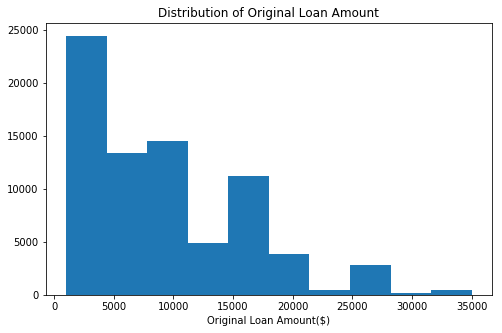

In [39]:
# Plotting a simple histogram

plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount')
plt.xlabel('Original Loan Amount($)')
plt.title('Distribution of Original Loan Amount');

In [40]:
# Getting the summary statistics for loan original amount column to get a standard scale for the plot

df_loan.LoanOriginalAmount.describe()

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

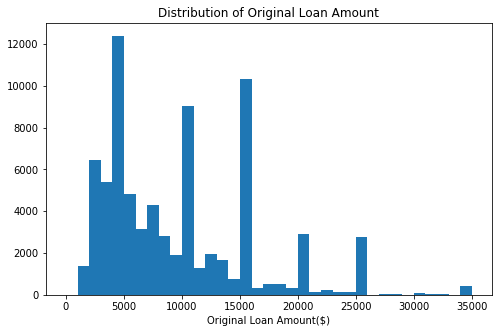

In [41]:
# Plotting a histogram of the loan original amount variabe using a standard scale

binsize = 1000
bins = np.arange(0, df_loan['LoanOriginalAmount'].max() + binsize, binsize)
plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount($)')
plt.title('Distribution of Original Loan Amount');

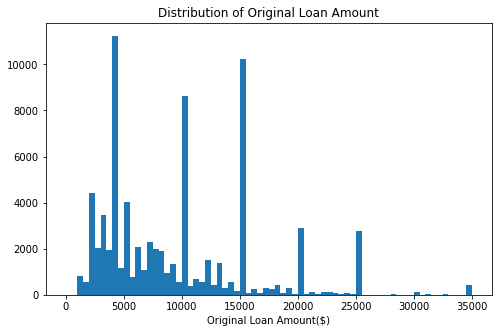

In [42]:
# Further exploration with a smaller bin size

binsize = 500
bins = np.arange(0, df_loan['LoanOriginalAmount'].max() + binsize, binsize)
plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount($)')
plt.title('Distribution of Original Loan Amount');

#### Observation

> The distribution is trimodal, and there are peaks at 5k, 10k, 15k, 20k. This indicates that these loans are in multiples of 5000. The smaller peaks at 7k, 8k, 9k, 11k, 12k, 13k, show that majority of the loans are in multiples of 1000

2. Next we'll look at second variable of interest : Borrower APR

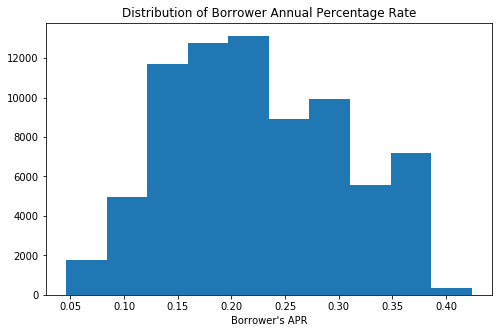

In [43]:
# Plotting a simple histogram

plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR')
plt.xlabel("Borrower's APR")
plt.title('Distribution of Borrower Annual Percentage Rate');

In [44]:
# Getting the summary statistics for BorrowerAPR column to get a standard scale for the plot

df_loan.BorrowerAPR.describe()

count    76216.000000
mean         0.223901
std          0.079372
min          0.045830
25%          0.161570
50%          0.215660
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64

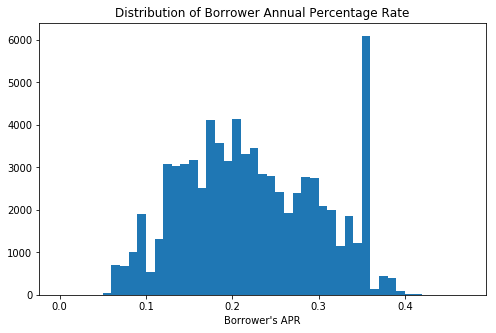

In [45]:
# Plotting a histogram of Borrower APR variabe using a standard scale

bins = np.arange(0, df_loan['BorrowerAPR'].max() + 0.05, 0.01)
plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel("Borrower's APR")
plt.title('Distribution of Borrower Annual Percentage Rate');

In [46]:
# Checking for loans greater than 0.4

df_loan[df_loan['BorrowerAPR'] > 0.4]

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
2294,454418,2010-04-15 17:56:43.700,36,Completed,0.40243,0.3500,HR,3,1,UT,...,not home owner,0.29,"$25,000-49,999",3708.0,1200,Q3 2010,0.00,2010,September,00:00:00
8750,476850,2010-09-24 16:21:20.063,36,Completed,0.41355,0.3500,HR,4,7,TX,...,home owner,0.27,"$100,000+",10500.0,1000,Q4 2010,45.24,2010,October,00:00:00
11658,475795,2010-09-15 19:10:13.497,36,Completed,0.41355,0.3500,HR,5,7,NY,...,not home owner,0.05,"$25,000-49,999",3333.0,1000,Q3 2010,45.24,2010,September,00:00:00
12277,471481,2010-08-14 08:46:04.633,36,Completed,0.41355,0.3500,HR,5,1,KY,...,not home owner,0.01,"$50,000-74,999",5234.0,1000,Q3 2010,45.24,2010,August,00:00:00
13285,483584,2010-11-09 14:43:53.697,36,Completed,0.40023,0.3500,HR,5,1,FL,...,not home owner,0.17,"$25,000-49,999",3200.0,1250,Q4 2010,56.55,2010,November,00:00:00
15623,472918,2010-08-24 07:23:31.473,36,Completed,0.40679,0.3435,E,6,3,TX,...,home owner,0.10,"$75,000-99,999",7667.0,1000,Q3 2010,44.87,2010,September,00:00:00
15624,473029,2010-08-24 19:07:26.757,36,Completed,0.41355,0.3500,HR,1,7,NY,...,not home owner,2.20,"$50,000-74,999",4833.0,1000,Q3 2010,45.24,2010,August,00:00:00
18473,486869,2010-12-05 17:30:54.257,36,Completed,0.41355,0.3500,HR,2,1,NY,...,home owner,0.09,"$100,000+",10833.0,1000,Q4 2010,45.24,2010,December,00:00:00
19089,486562,2010-12-02 12:56:27.757,36,Completed,0.41355,0.3500,HR,1,1,ID,...,home owner,0.26,"$1-24,999",1400.0,1000,Q4 2010,45.24,2010,December,00:00:00
19488,481704,2010-10-27 06:30:58.340,36,Completed,0.41355,0.3500,HR,4,1,MN,...,home owner,0.08,"$25,000-49,999",3250.0,1000,Q4 2010,45.24,2010,November,00:00:00


#### Observation

> The distribution looks multimodal,with a very sharp peak between 0.36 and 0.37, there are peaks also at 0.1, and 0.2. There a very 54 borrowers with APR's greater than 0.4

3. The next variable we'll investigate the first predictor variable which is the Stated monthly income

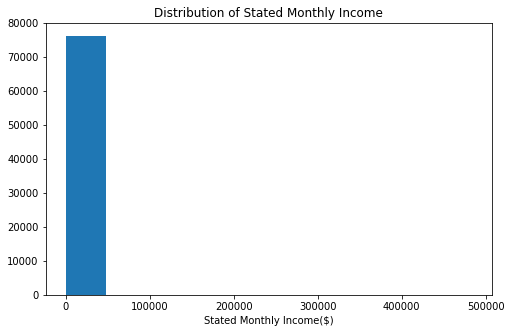

In [47]:
# Plotting a simple histogram

plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome')
plt.xlabel('Stated Monthly Income($)')
plt.title('Distribution of Stated Monthly Income');

In [48]:
# Getting the summary statistics for StatedMonthlyIncome column to get a standard scale for the plot

df_loan.StatedMonthlyIncome.describe()

count     76216.000000
mean       6002.835271
std        5110.742626
min           0.000000
25%        3583.000000
50%        5042.000000
75%        7250.000000
max      483333.000000
Name: StatedMonthlyIncome, dtype: float64

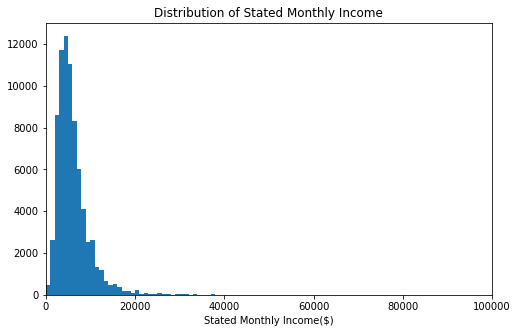

In [49]:
# Plotting a histogram of the Stated monthly income variabe using a standard scale

binsize = 1000
bins = np.arange(0, df_loan['StatedMonthlyIncome'].max() + binsize, binsize)
plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income($)')
plt.xlim(0, 100000)
plt.title('Distribution of Stated Monthly Income');

> The plot shows a long tail distribution, which shows the prescence of outliers

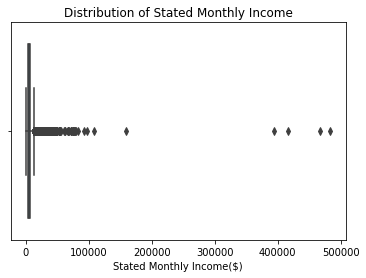

In [50]:
# Using a box plot to check for outliers in stated monthly income

sb.boxplot(df_loan['StatedMonthlyIncome'])
plt.xlabel('Stated Monthly Income($)')
plt.title('Distribution of Stated Monthly Income');

#### Observation

In the box plot above, the dots prove the prescence of outliers present in stated monthly income. We woud have to remove these outliers, by calculating the inter quartile range and trimming the data below the lower limit or above the upper limit.

In [51]:
# Calculating the IQR to detect outliers

Q1 = df_loan['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_loan['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5 * IQR
UpperLimit = Q3 + 1.5 * IQR
print(LowerLimit)
print(UpperLimit)

-1917.5
12750.5


In [52]:
# Number of rows before trimming of outliers

df_loan.shape

(76216, 23)

In [53]:
# Transforming the data frame by trimming the outliers

df_loan = df_loan[df_loan['StatedMonthlyIncome'] < UpperLimit]

In [54]:
# Number of rows after trimming of outliers

df_loan.shape

(72787, 23)

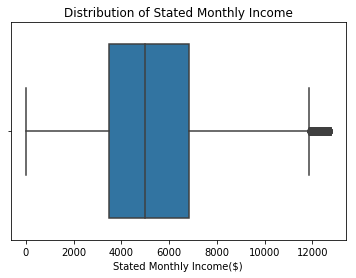

In [55]:
# Using a box plot to check if trimming was successful

sb.boxplot(df_loan['StatedMonthlyIncome'])
plt.xlabel('Stated Monthly Income($)')
plt.title('Distribution of Stated Monthly Income');

In [56]:
# Getting the summary statistics for trimmed StatedMonthlyIncome column to get a standard scale for the plot

df_loan.StatedMonthlyIncome.describe()

count    72787.000000
mean      5399.385000
std       2500.062248
min          0.000000
25%       3500.000000
50%       5000.000000
75%       6843.500000
max      12750.000000
Name: StatedMonthlyIncome, dtype: float64

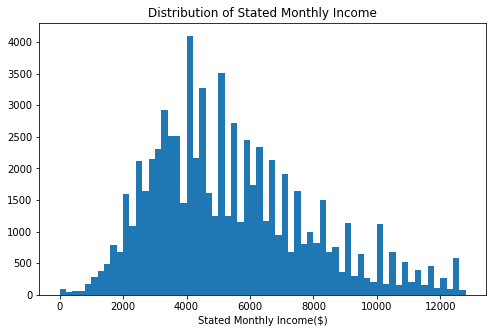

In [57]:
# Plotting a histogram of the trimmed Stated monthly income variabe using a standard scale

binsize = 200
bins = np.arange(0, df_loan['StatedMonthlyIncome'].max() + binsize, binsize)
plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income($)')
plt.title('Distribution of Stated Monthly Income');

> The distribution shows more people earn lower stated monthly income.

4. Next we'll investigate the income range with the most borrowers

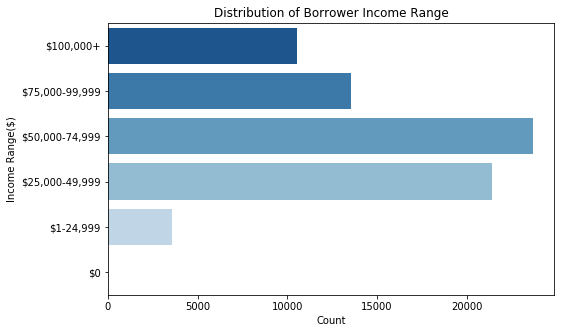

In [58]:
# Using a countplot for this exploration

plt.figure(figsize = [8, 5])
sb.countplot(data = df_loan, y = 'IncomeRange', palette = "Blues_r")
plt.xlabel('Count')
plt.ylabel('Income Range($)')
plt.title('Distribution of Borrower Income Range');

#### Observation

> $50,000-74,999 is the income range with the highest borrowers

5. The next variable of interest we'll investigate is Debt To Income Ratio

In [59]:
# Getting the summary statistics for DebtToIncomeRatio column to get a standard scale for the plot

df_loan.DebtToIncomeRatio.describe()

count    72787.000000
mean         0.262858
std          0.324745
min          0.010000
25%          0.160000
50%          0.230000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

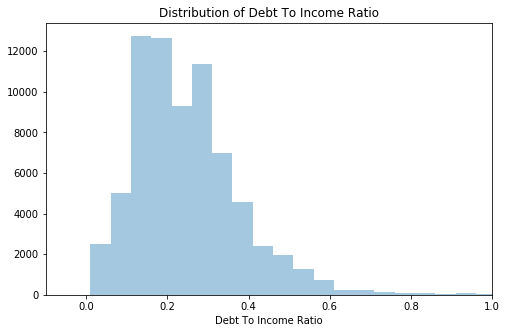

In [60]:
# Plotting a histogram of DebtToIncomeRatio variabe using a standardscale

plt.figure(figsize = [8, 5])
sb.distplot(df_loan['DebtToIncomeRatio'], kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt To Income Ratio')
plt.title('Distribution of Debt To Income Ratio');

#### Observation

> From the plot it shows that most borrowers who apply for a loan have a debt to ratio income of about 0.2 that is 20%

6. Another variable of interest is Prosper score, this score measures the risk a lender shoud expect on a loan approval. On a scale of 1-10, with 10 being the best or lowest risk score.

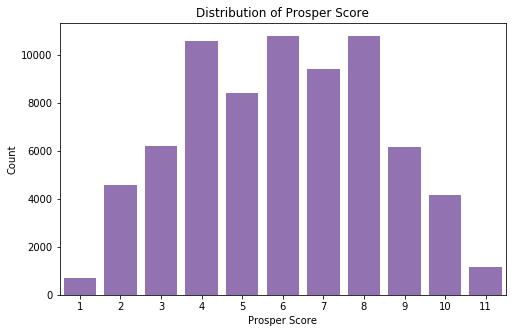

In [61]:
#selecting color palette

base_color = sb.color_palette()[4]

# Using a countplot to plot the ordinal variable

plt.figure(figsize = [8, 5])
sb.countplot(df_loan['ProsperScore'], color = base_color)
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Distribution of Prosper Score');

#### Observation

> The major peaks are at 4, 6, and 8. These are the most commom risk factors

7. Another variable we'll like to explore is the loan term

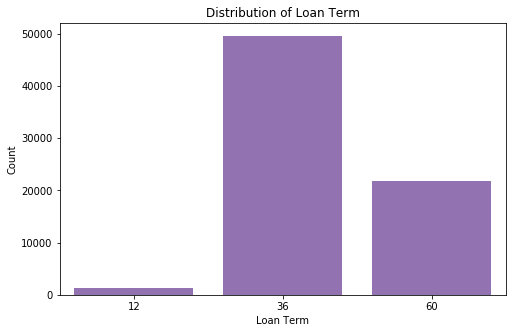

In [62]:
# Using a countplot to plot the variable

plt.figure(figsize = [8, 5])
sb.countplot(df_loan['Term'], color = base_color)
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Term');

#### Observation

> This indicates that majority of the loans have a length of 36 months that is 3 years.

8. Another variable that I believe will have an effect on the maximum amount of loan given is the monthly loan payment

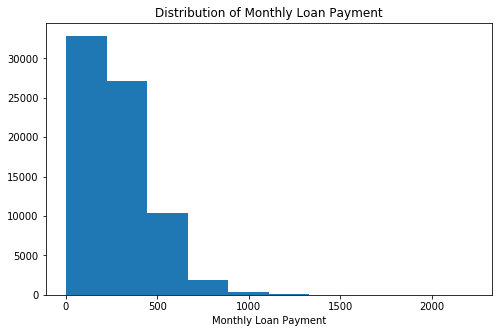

In [63]:
# Plotting a simple histogram to show the distribution of monthly loan payment 

plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment')
plt.xlabel("Monthly Loan Payment")
plt.title('Distribution of Monthly Loan Payment');

In [64]:
# Getting the summary statistics for MonthlyLoanPayment column to get a standard scale for the plot

df_loan.MonthlyLoanPayment.describe()

count    72787.000000
mean       287.463192
std        180.249809
min          0.000000
25%        156.490000
50%        249.430000
75%        384.580000
max       2218.530000
Name: MonthlyLoanPayment, dtype: float64

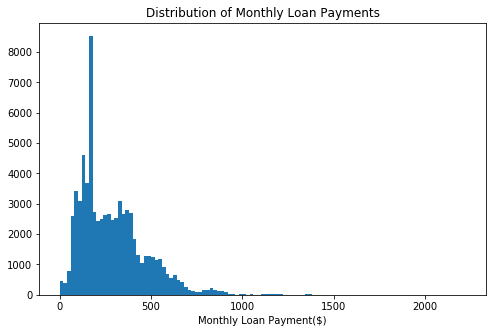

In [65]:
# Plotting histogram of MonthlyLoanPayment variabe using a standard scale

binsize = 20
bins = np.arange(0, df_loan['MonthlyLoanPayment'].max() + binsize, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment($)')
plt.title('Distribution of Monthly Loan Payments');

#### Observation

> The plot shows that majority of the monthly loan payments are below $500

9. We'll explore other variables in the data set

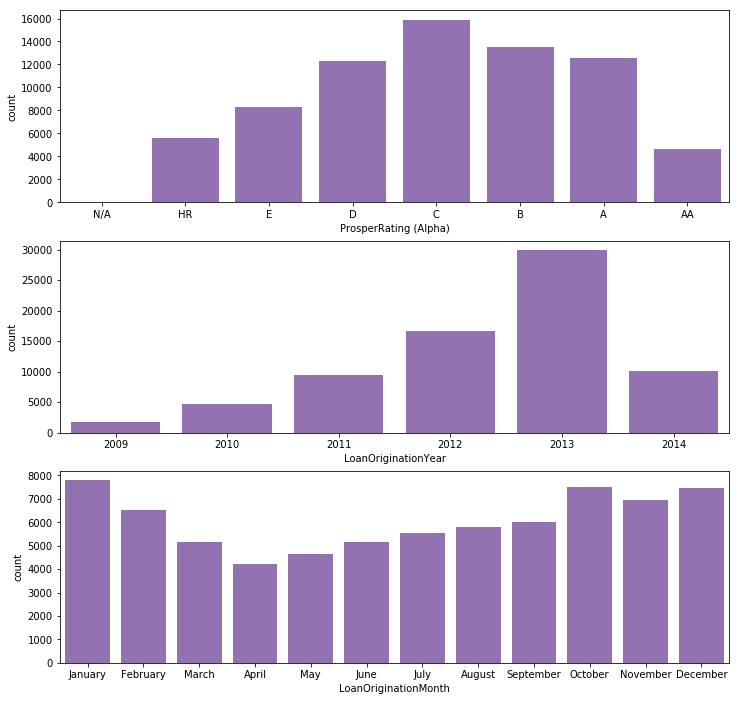

In [66]:
# Plotting ordinal variables together

fig, ax = plt.subplots(nrows = 3, figsize = [12, 12])

default_col = sb.color_palette()[4]

sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = default_col, ax = ax[0])
sb.countplot(data = df_loan, x = 'LoanOriginationYear', color = default_col, ax = ax[1])
sb.countplot(data = df_loan, x = 'LoanOriginationMonth', color = default_col, ax = ax[2]);

#### Observation
> Majority of the borrowers have a prosper rating of C

> Most of the loans are generated in the year 2013, and in the first month January and in the last three months October to December 

10. Still exploring other variables

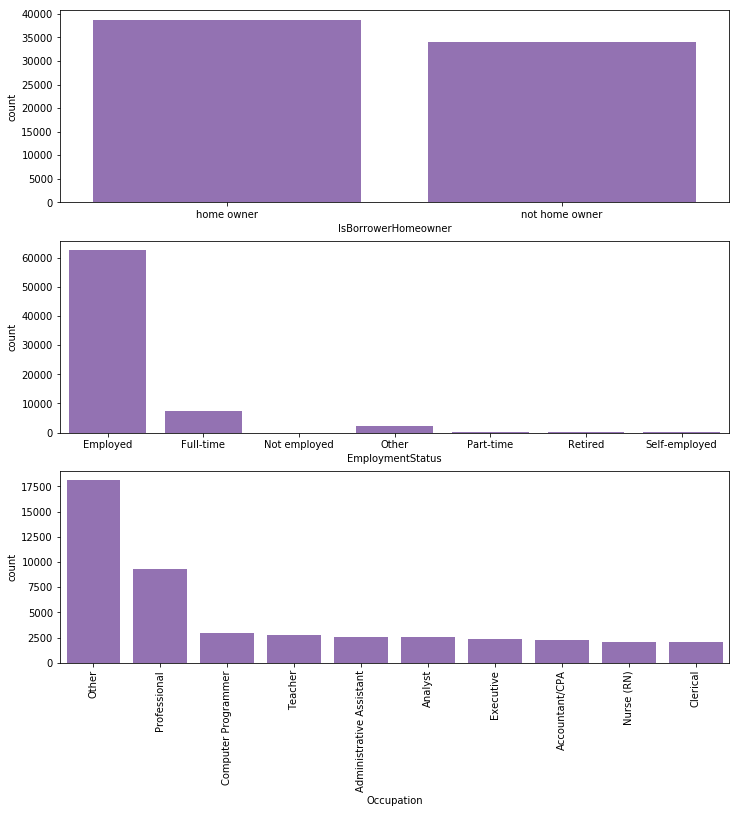

In [67]:
# Plotting norminal variables together

fig, ax = plt.subplots(nrows = 3, figsize = [12, 12])

default_col = sb.color_palette()[4]

sb.countplot(data = df_loan, x = 'IsBorrowerHomeowner', color = default_col, ax = ax[0])
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = default_col, ax = ax[1])
sb.countplot(data = df_loan, x = 'Occupation', order = df_loan['Occupation'].value_counts().head(10).index,
             color = default_col, ax = ax[2])
plt.xticks(rotation = 90);

#### Observation

> Majority of the borrowers are home owners

> Most of the borrowers are employed

> Professionals and Computer programmers seem to be the specified occupations with the most borrowers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the Loan Original amount had a trimodal shape, and there were peaks ranging from 5k to 20k. The majority of the loans, were observed as smaller peaks multiples of 1000. There where no unusual points, and there was no need for transformation.

> The distribution looked multimodal, and a  sharp peak was observed between 0.36 and 0.37. No unusual points where observed and there was no need for transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the exploration of Stated monthly income, it was observed that there were data points that were far off from the normal data points, they seemed highly outrageous and made up. Upon closer inspection, they were observed to be outliers. The data frame had to be trimmed in order to remove the outliers. 

## Bivariate Exploration

In this section, I'll investigate the relationships between pairs of variables that were investigated earlier.

11. To begin with, I will investigate the pairwise correlation between the features in the data set

In [68]:
# List of columns and variable type

df_loan.dtypes

ListingNumber                        object
ListingCreationDate          datetime64[ns]
Term                                  int64
LoanStatus                         category
BorrowerAPR                         float64
BorrowerRate                        float64
ProsperRating (Alpha)              category
ProsperScore                       category
ListingCategory (numeric)          category
BorrowerState                        object
Occupation                           object
EmploymentStatus                   category
EmploymentStatusDuration            float64
IsBorrowerHomeowner                category
DebtToIncomeRatio                   float64
IncomeRange                        category
StatedMonthlyIncome                 float64
LoanOriginalAmount                    int64
LoanOriginationQuarter               object
MonthlyLoanPayment                  float64
LoanOriginationYear                category
LoanOriginationMonth               category
LoanOriginationTime             

In [69]:
# Sorting variables into categorical and numeric lists

num_var = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'MonthlyLoanPayment']

cat_var = ['Term', 'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner']

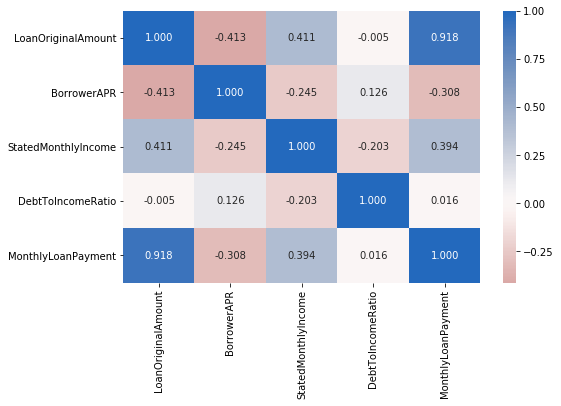

In [70]:
# Correlation plot

plt.figure(figsize = [8, 5])
sb.heatmap(df_loan[num_var].corr(), annot = True, fmt = '.3f', 
           cmap = 'vlag_r', center = 0 );

I will further investigate the correlations using scatter plots

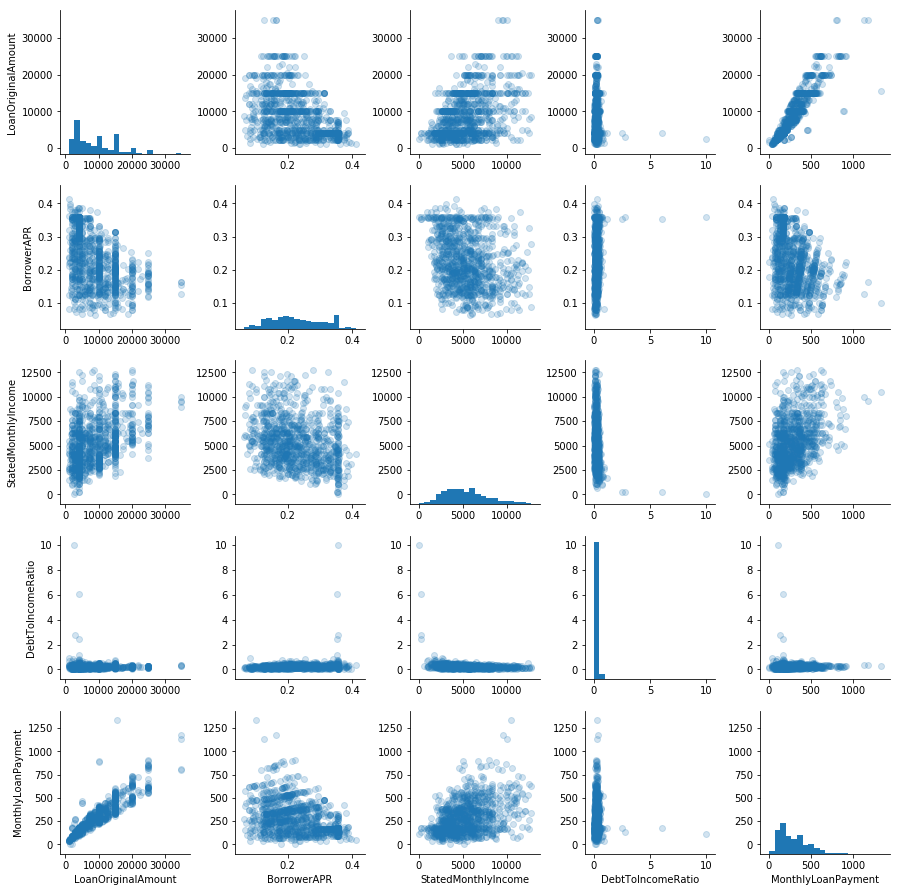

In [71]:
#Plot matrix: sample 1000 loans so plots can be clearer and run faster

df_loan_samp = df_loan.sample(1000)

g = sb.PairGrid(data = df_loan_samp, vars = num_var)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 0.2);

#### Observation

> These plots show that Loan Original Amount and Brrower APR are negatively correlated, the correlation coefficient is -0.411, which proves that, the more the loan amount the lower the APR.

> We also see the correlation coefficient for Loan Original amount and Stated monthy income is 0.919, which shows a very strong positive correlation, which makes sense because borrowers with higher monthly income can get access to more loan amounts. 

> There is also a weak positive correlation between Monthly loan payment and stated monthly income, the correlation cofficient is 0.396 

12. Let's forge ahead with investigating the relationship between loan original amount, borrower APR, Stated monthy income and the categorical variables.

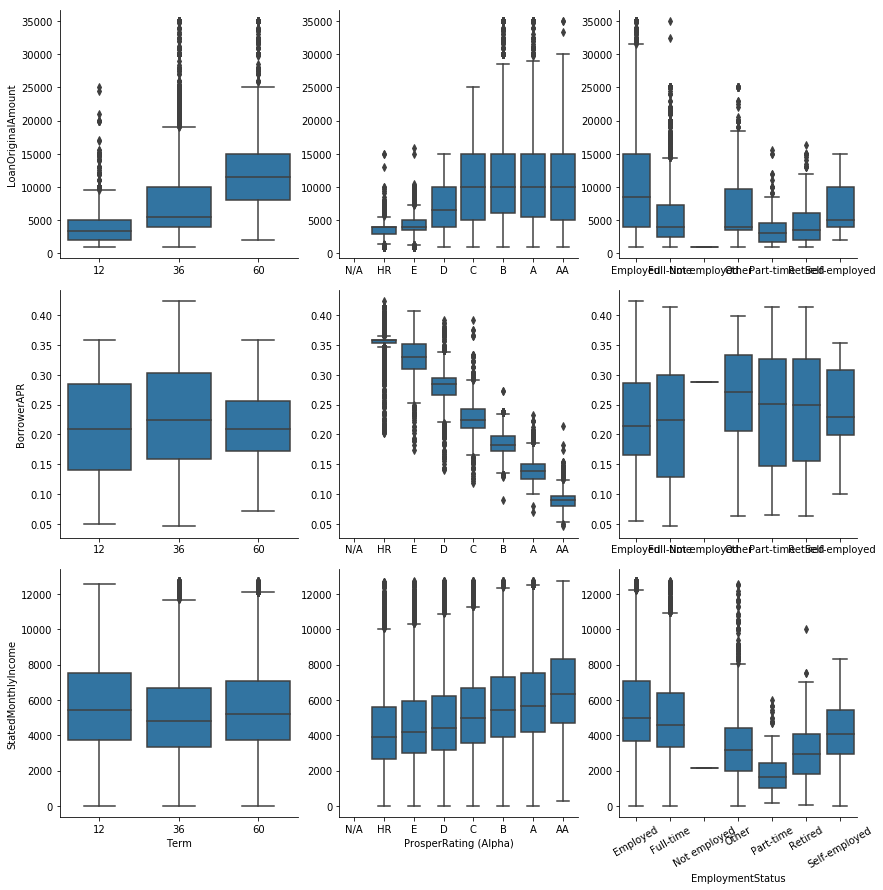

In [72]:
# Plot matrix of numeric features against categorical features

def boxgrid(x, y, **kwargs):
    """Quick hack for creating box plots with seaborn's PairGrid. """
    def_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = def_color)
    
plt.figure(figsize =[12, 15])
g = sb.PairGrid(data = df_loan, y_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome'], 
                x_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus'], size = 4, aspect = 1.0)

g.map(boxgrid);
plt.xticks(rotation = 30);

#### Observation

> We can observe from the plot matrix, that with an increment in the loan original amount there is an increment in loan term. Which implies that when borrowers increase the loan amount to be borrowed, the loan term is extended.

> We can also see that borrowers with the best prosper ratings have the lowest APR, and they have the highest amount of stated monthly income, as well as their loan original amount. This means that prosper rating has a strong effect on Brrower's APR.

> Borrowers with the employment status; Employed, full-time and self-employed have more monthly incomme and loan original amount than the other employment status.

13. Finally, let's take a look at the relationships between three categoical variables.

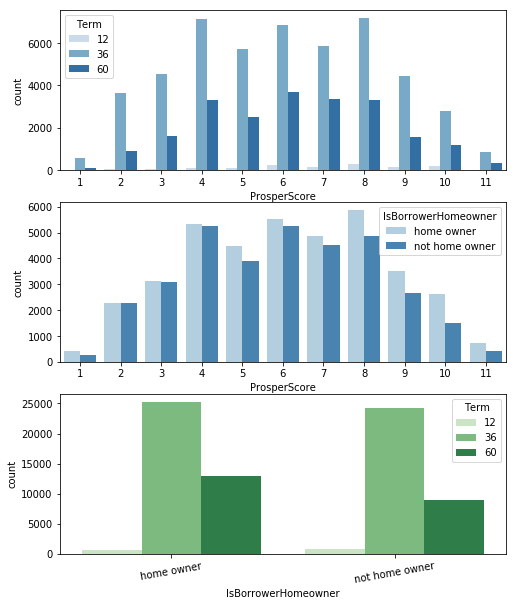

In [73]:
plt.figure(figsize = [8, 10])

#subplot 1 Prosper score vs term
plt.subplot(3, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperScore', hue = 'Term', palette = 'Blues' )

#subplot 2 Prosper score vs IsBorrowerHomeowner
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Blues' )

#subplot 2 IsBorrowerHomeowner vs term
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_loan, x = 'IsBorrowerHomeowner', hue = 'Term', palette = 'Greens' )
plt.xticks(rotation = 10);

Now I'd like to look at the relationships between the major qauntitative variables; LoanOriginalAmount and BorrowerAPR, then LoanOriginalAmount and MonthlyLoanPayment

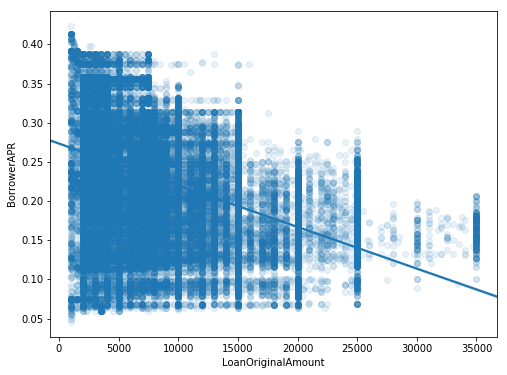

In [74]:
# Using seaborn's reglot

plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws = {'alpha' : 0.1});

> This plot shows that as the loan amount increases the APR decreases. Generally there is a negative correlation between the Borrower's APR and Loan Original amount

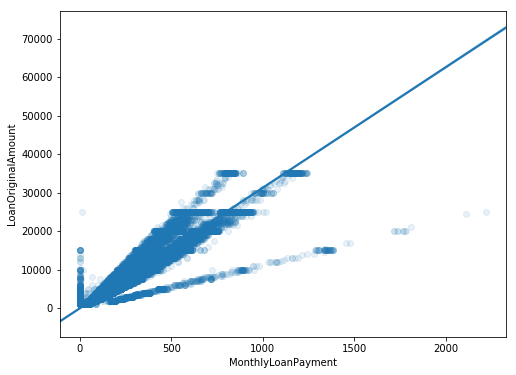

In [75]:
# Using seaborn's reglot

plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', scatter_kws = {'alpha' : 0.1});

> We can see a strong positive correlation from the plot, indicating that the more the loan amount the higher the monthly payment. This means that the monthly payment is dependent on the loan amount.

Next I would like to investigate the relationship between prosper score and loan amount, then occupation and loan amount

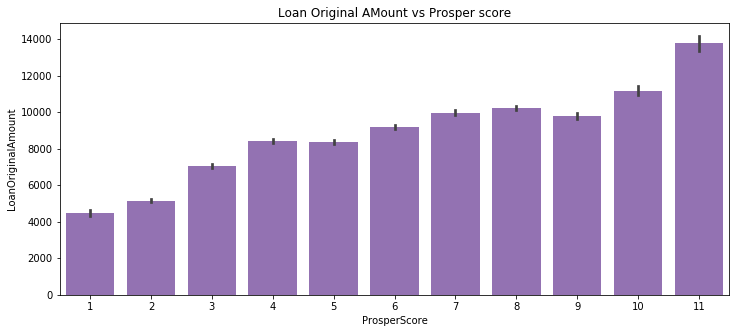

In [76]:
# Plotting the relationship between Loan original amount and prosper score

plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[4]
sb.barplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', color = base_color)
plt.title('Loan Original AMount vs Prosper score');

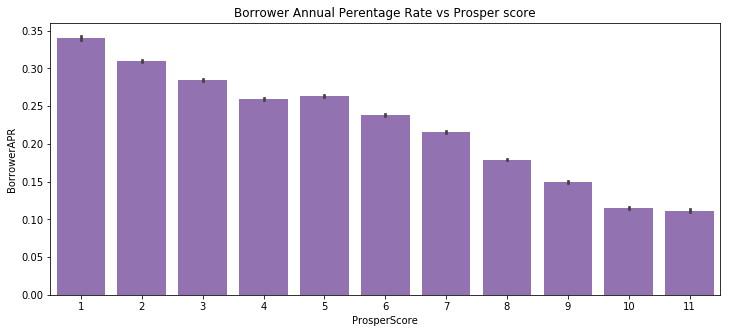

In [77]:
# Plotting the relationship between Loan original amount and prosper score

plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[4]
sb.barplot(data = df_loan, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color)
plt.title('Borrower Annual Perentage Rate vs Prosper score');

> The best prosper risk score have the highest loan amount, while the least risk scores have the highest APR 

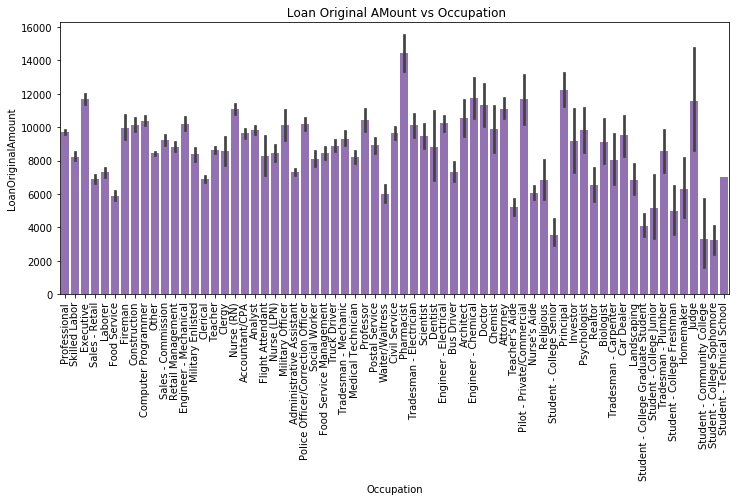

In [78]:
# Plotting the relationship between occupation and loan original amount

plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[4]
sb.barplot(data = df_loan, x = 'Occupation', y = 'LoanOriginalAmount', color = base_color)
plt.title(' Loan Original AMount vs Occupation')
plt.xticks(rotation = 90);

> The occupation with the highest loan amount is Pharmacist

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a negative relationship between the amount of loan borrowed and the borrower's APR, meaning the higher the amount of loan borrowed the lower the borrower's APR.

> The borrower's with the best prosper ratings have the least APR, while the ones with the least worst prosper scores have the highest APR

> There is also a positive relationship between the loan amount and the borrower's stated monthly income, which makes sense since as the loans will be given out to people who earn a huge amount monthly.

> We also observed some sort of positive relationship between the loan amount and the monthly payment, which also makes sense because, the monthly payment is probably calculated based on the amount of loan taken. Therefore the higher the loan amount, the higher the monthly payment. Although the plot showed 3 lines, i would investigate it further in the next section.

> The borrowers with best prosper risk scores  and prosper ratings have a high loan original amount. This means that borrowers with the best risk scores have a higher chance of getting loans.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrower's with the best ratings have a high stated monthly income

> The employed, full-time and self-employed borrowers also have the best ratings and the highest stated mnthly income.

> The borrower's with the prosper scores of 4, 6, 7 have the highest loan term of 60 months(4 years), while the most common loan term across all risk scores is 12 months (1 year)

> finally home owners have the longest loan term and Pharmacist is the occupation with the highest loan amount,probably because it is one of the highest paying jobs.

## Multivariate Exploration

In this section I would like to investigate how the other variables affect the relationship between the main features of my exploration, I also want to look further into the monthly payment vs loan original amount plot

I want to look at how loan term(categorical variable) influences the relationship between borrower APR and loan original amount

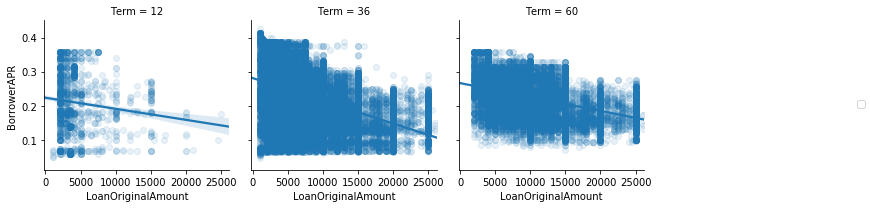

In [79]:
# Plot of term effect on Borrower's APR and loan original amount

g = sb.FacetGrid(data = df_loan, aspect = 1.0, size = 3, col = 'Term', col_wrap = 4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.04, scatter_kws = {'alpha' : 0.1});
g.add_legend();

> It looks like loan term has no effect on the relationship between BorrowerAPR and loan original amount

Next up I would like to look further into the monthly payment vs loan original amount plot, where we observed three lines on the plot, I am interested in confirming if a third variable feature has an effect on the relationship

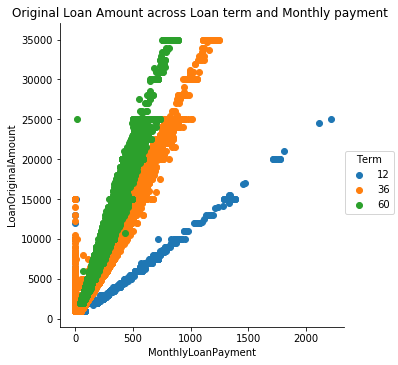

In [80]:
# PLotting the term effect on the relationship between loan amount and monthly payment

g = sb.FacetGrid(data = df_loan, hue = 'Term', size = 5)
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount')
plt.title('Original Loan Amount across Loan term and Monthly payment ')
g.add_legend();

> So clearly we can see that we were right to assume a third variable had an effect on the outcome of the plot initially. So we observe that loan terms with the length of 36 and 60 months, have the highest loan amount. 

> We also observe that the longer the loan term, the lower the scheduled monthly payment.

I would like to see if term has an effect on the relationship between Borrower APR and prosper ratings

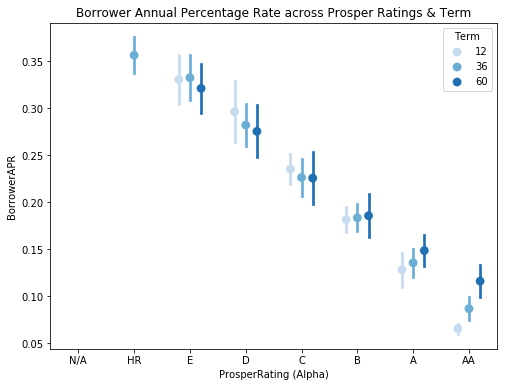

In [81]:
# Potting term effect on the relationship between APR and ratings using a pointplot

fig = plt.figure(figsize = [8, 6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
                 palette ='Blues', linestyles= '', dodge = 0.4, ci = 'sd')

plt.title('Borrower Annual Percentage Rate across Prosper Ratings & Term')
ax.set_yticklabels([], minor = True);

> The plot shows that the borrower's APR decreases with an increase in loan term for borrowers with ratings of HR through to C, but for ratings from B to AA the APR increases with the increase in loan term.

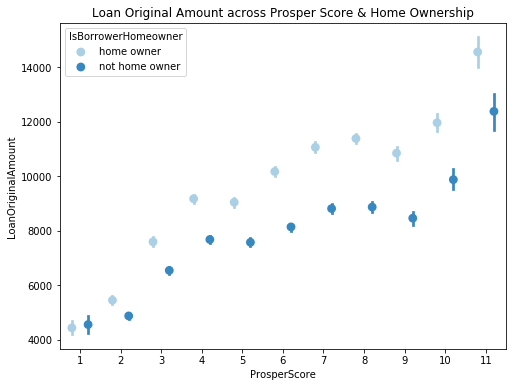

In [82]:
# Potting IsBorrowerHomeowner effect on the relationship laon amount and prosper score using a pointplot

fig = plt.figure(figsize = [8, 6])
ax = sb.pointplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
                 palette ='Blues', linestyles= '', dodge = 0.4)

plt.title('Loan Original Amount across Prosper Score & Home Ownership')
ax.set_yticklabels([], minor = True);

> We can see that Home owners with a the best posper risk scores have access to higher loan amounts

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I decided to check the effect of loan term on the relationship between borrower's APR and loan amount, and it was observed that there was no effect.

> It was observed that the positive correlation between monthly payment and loan amount is enhanced by the length of the loan term. The higher the loan amounts, the longer the term and the lower the scheduled monthly payment.

> Also the Borrowers with prosper ratings of HR-C have lower APR and loan terms of 36 and 60 months, while those with ratings of B-AA have an increase in APR, with an increase in loan term.

> Finally Home owners have the best risk scores and this grants them access to high loan amounts.

### Were there any interesting or surprising interactions between features?

> There were no surprises, but it was intriguing to see that Loan term had an effect on most of the relationships.

## Conclusions
In this exploratory analysis I discovered that

Majority of the borrowers earn lower monthly income, and the income range with the most borrowers is $50,000 - 74,999

Most borowers have a debt to ratio income of 20%, and majority of loans are issued in the year 2013. The first months of the year (January - February) and the last 3 months (October - December).

Most of the borrowers own homes, and the occupations with the highest borrowers are, Professionals and Computer programmers, but Pharmacists have the highest loan amount

I observed that Borrower APR has a negative relationship with loan amount. Borrowers with large monthly income can get loans of huge amount.

Borrowers that are employed, full-time employees and self-employed, who earn high monthly incme will definitely get access to large loan amounts

I also observed that prosper ratings have a strong effect on the borrower's APR, those with the best ratings can also get access to large loan amounts.

Finally to get a large loan amount you have to have an occupation that pays a large monthly income and atleast own a house. Then a good prosper risk score of 10/11 can guarantee access to large loan amounts.